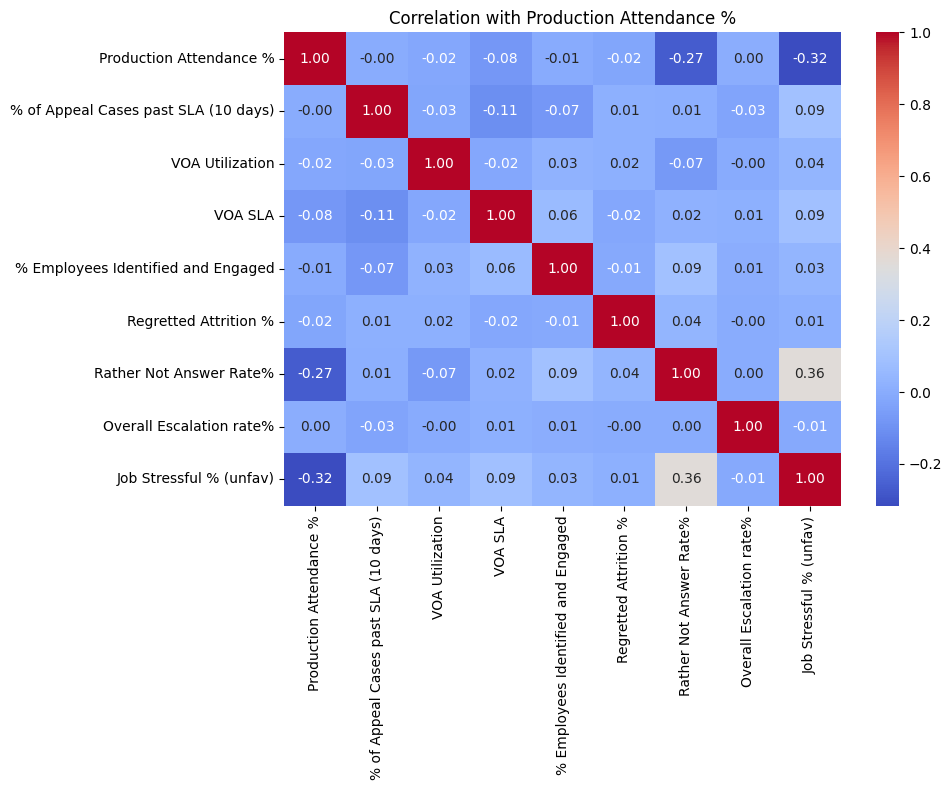

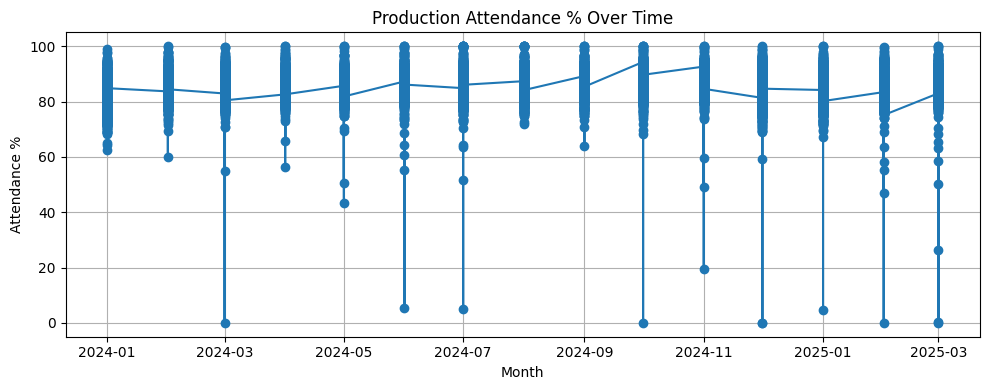

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
# Load data
df = pd.read_csv("Datafile_attendance.csv")

# Clean percentage columns
percent_cols = [
 'Production Attendance %',
 '% of Appeal Cases past SLA (10 days)',
 'VOA Utilization',
 'VOA SLA',
 '% Employees Identified and Engaged',
 'Regretted Attrition %',
 'Rather Not Answer Rate%',
 'Overall Escalation rate%',
 'Job Stressful % (unfav)'
]

# Remove '%' and convert to float
for col in percent_cols:
    if col in df.columns:
        df[col] = df[col].str.replace('%', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Correlation matrix
corr = df[percent_cols].corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Production Attendance %")
plt.tight_layout()
plt.show()

# Line plot for attendance over time
df['Year Month'] = pd.to_datetime(df['Year Month'], errors='coerce')
df = df.sort_values('Year Month')

plt.figure(figsize=(10, 4))
plt.plot(df['Year Month'], df['Production Attendance %'], marker='o')
plt.title("Production Attendance % Over Time")
plt.xlabel("Month")
plt.ylabel("Attendance %")
plt.grid(True)
plt.tight_layout()
plt.show()

Regression Equation: Attendance % = 84.29 + (-0.0483) × Attrition %
R² Score: 0.00055
RMSE: 4.36


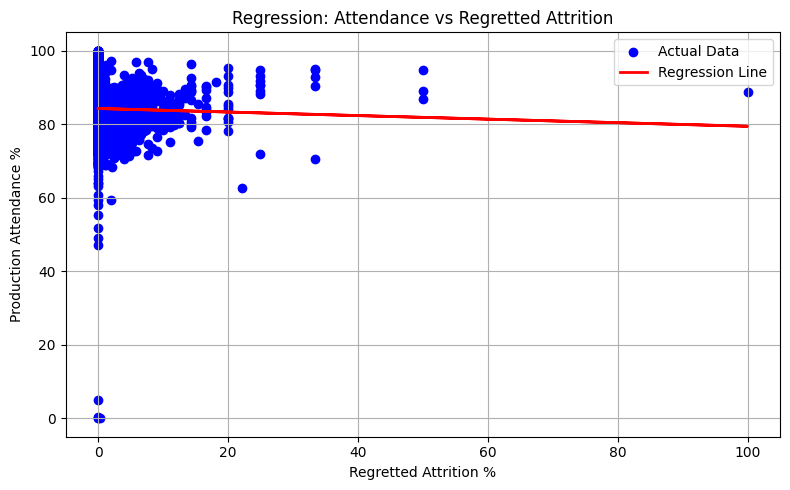

In [3]:
#2 
# Regression Analysis with Attendance and Attrition
df_reg = df[['Production Attendance %', 'Regretted Attrition %']].dropna()
X = df_reg[['Regretted Attrition %']]
y = df_reg['Production Attendance %']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
coef = model.coef_[0]
intercept = model.intercept_

print(f"Regression Equation: Attendance % = {intercept:.2f} + ({coef:.4f}) × Attrition %")
print(f"R² Score: {r2:.5f}")
print(f"RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Regretted Attrition %")
plt.ylabel("Production Attendance %")
plt.title("Regression: Attendance vs Regretted Attrition")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

                               OLS Regression Results                              
Dep. Variable:     Production Attendance %   R-squared:                       0.047
Model:                                 OLS   Adj. R-squared:                  0.046
Method:                      Least Squares   F-statistic:                     30.76
Date:                     Wed, 18 Jun 2025   Prob (F-statistic):           1.27e-58
Time:                             22:55:55   Log-Likelihood:                -15949.
No. Observations:                     6202   AIC:                         3.192e+04
Df Residuals:                         6191   BIC:                         3.199e+04
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

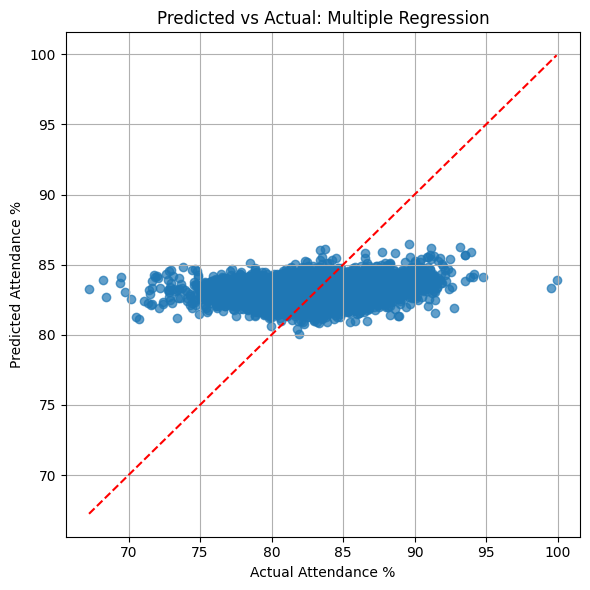

In [4]:
#3
# Multiple linear regression analysis
percent_cols = [
 'Production Attendance %',
 '% of Appeal Cases past SLA (10 days)',
 'VOA Utilization',
 'VOA SLA',
 'VOA Negative Comments',
 '% Employees Identified and Engaged',
 'Regretted Attrition %',
 'Rather Not Answer Rate%',
 'Overall Escalation rate%',
 'Job Stressful % (unfav)'
]
# Clean percentage columns
percent_cols = [
 'Production Attendance %',
 '% of Appeal Cases past SLA (10 days)',
 'VOA Utilization',
 'VOA SLA',
 'VOA Negative Comments',
 '% Employees Identified and Engaged',
 'Regretted Attrition %',
 'Rather Not Answer Rate%',
 'Overall Escalation rate%',
 'Job Stressful % (unfav)'
]

for col in percent_cols:
    if col in df.columns:
        df[col] = (
        df[col].astype(str)
        .str.replace('%', '', regex=False)
        .str.strip()
        .replace('', np.nan)
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')
df['Production Headcount'] = pd.to_numeric(df['Production Headcount'], errors='coerce')

# Drop rows with missing values
all_features = ['Production Headcount'] + [col for col in percent_cols if col != 'Production Attendance %']
model_df = df.dropna(subset=all_features + ['Production Attendance %'])

#Set up X and y
X = model_df[all_features].astype(float)
y = model_df['Production Attendance %'].astype(float)

X = sm.add_constant(X)

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

#Plot predicted vs actual
y_pred = ols_model.predict(X)
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Attendance %")
plt.ylabel("Predicted Attendance %")
plt.title("Predicted vs Actual: Multiple Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

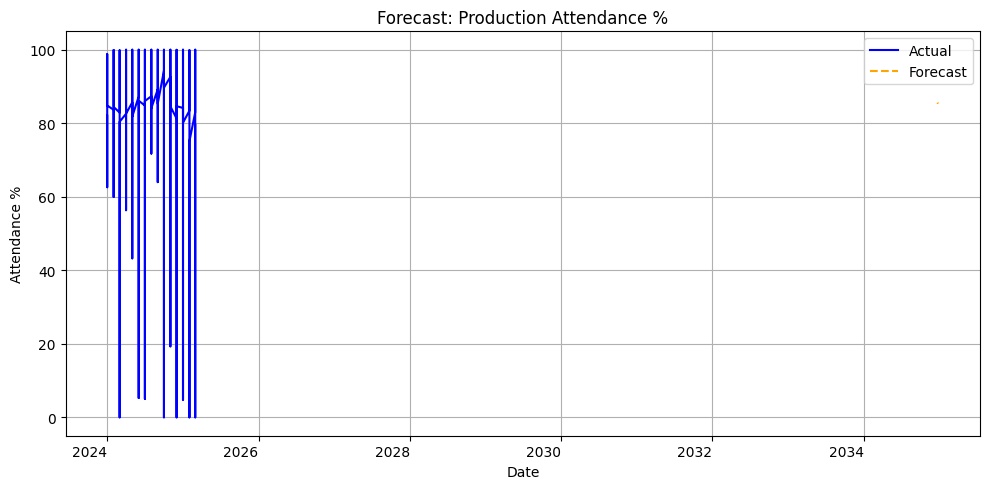

In [5]:
#4
#Forecast
# Convert Month column to datetime
df['Year Month'] = pd.to_datetime(df['Year Month'], errors='coerce')
df_ts = df[['Year Month', 'Production Attendance %']].dropna()
df_ts.set_index('Year Month', inplace=True)
ts = df_ts['Production Attendance %']

# Fit ARIMA model (you can auto-tune order using pmdarima if needed)
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

# Plot actual + forecast
plt.figure(figsize=(10, 5))
ts.plot(label='Actual', color='blue')
forecast.plot(label='Forecast', color='orange', style='--')
plt.title('Forecast: Production Attendance %')
plt.xlabel('Date')
plt.ylabel('Attendance %')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

R² Score: 0.0793
RMSE: 9.15


C:\Users\admin\AppData\Local\Temp\ipykernel_5144\217658412.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(5), palette='viridis')


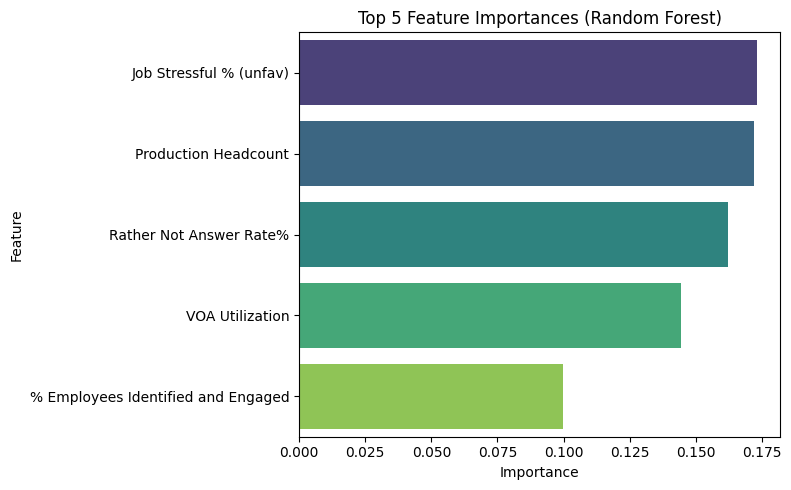

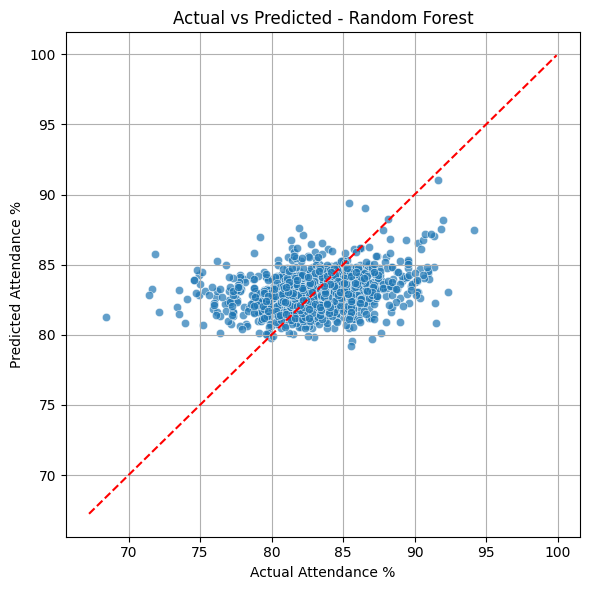

In [6]:
#5
# Random Forest Regression
# Input features
features = ['Production Headcount'] + [col for col in percent_cols if col != 'Production Attendance %']
X = model_df[features].astype(float)
y = model_df['Production Attendance %'].astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf):.2f}")

# Get feature importances
importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot top 5
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=features_df.head(5), palette='viridis')
plt.title('Top 5 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

#Plot Actual vs prediction 
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel("Actual Attendance %")
plt.ylabel("Predicted Attendance %")
plt.title("Actual vs Predicted - Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # 45-degree line
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:

print(corr.columns.tolist())
metrics = [
    'Production Attendance %',
    '% of Appeal Cases past SLA (10 days)',
    'VOA Utilization',
    'VOA SLA',
    'VOA Negative Comments',
    '% Employees Identified and Engaged',  
    'Regretted Attrition %',
    'Rather Not Answer Rate%',             
    'Job Satisfaction (Connections)',    
    'Job Stressful % (unfav)',           
    'Overall Escalation rate%'           
]

print("\nCorrelation coefficients with 'Production Attendance %':\n")
print("-" * 80)
for metric in metrics:
    if metric in corr.columns:
        value = corr.loc['Production Attendance %', metric]
        print(f"{metric:<55} | {value:>8.3f}")
    else:
        print(f"{metric:<55} | {'Not Found':>8}")
print("-" * 80)

['Production Attendance %', '% of Appeal Cases past SLA (10 days)', 'VOA Utilization', 'VOA SLA', '% Employees Identified and Engaged', 'Regretted Attrition %', 'Rather Not Answer Rate%', 'Overall Escalation rate%', 'Job Stressful % (unfav)']

Correlation coefficients with 'Production Attendance %':

--------------------------------------------------------------------------------
Production Attendance %                                 |    1.000
% of Appeal Cases past SLA (10 days)                    |   -0.000
VOA Utilization                                         |   -0.019
VOA SLA                                                 |   -0.076
VOA Negative Comments                                   | Not Found
% Employees Identified and Engaged                      |   -0.007
Regretted Attrition %                                   |   -0.023
Rather Not Answer Rate%                                 |   -0.266
Job Satisfaction (Connections)                          | Not Found
Job Stressfu